<a href="https://colab.research.google.com/github/leminhquoc248/AI_code/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

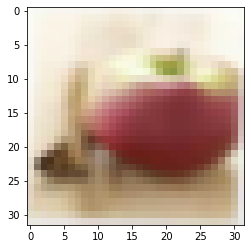

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,100)
y_test=np_utils.to_categorical(y_test,100)

In [ ]:
from keras.layers import Dense,Activation,Dropout
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale,StandardScaler
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                  validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
313/313 [==============================] - 12s 35ms/step - loss: 4.3104 - accuracy: 0.0526 - val_loss: 4.1489 - val_accuracy: 0.0649
Epoch 2/500
313/313 [==============================] - 10s 33ms/step - loss: 3.8926 - accuracy: 0.1018 - val_loss: 3.7668 - val_accuracy: 0.1281
Epoch 3/500
313/313 [==============================] - 10s 33ms/step - loss: 3.7515 - accuracy: 0.1246 - val_loss: 3.6865 - val_accuracy: 0.1345
Epoch 4/500
313/313 [==============================] - 10s 33ms/step - loss: 3.6454 - accuracy: 0.1438 - val_loss: 3.6042 - val_accuracy: 0.1557
Epoch 5/500
313/313 [==============================] - 11s 34ms/step - loss: 3.5720 - accuracy: 0.1595 - val_loss: 3.5869 - val_accuracy: 0.1566
Epoch 6/500
313/313 [==============================] - 11s 35ms/step - loss: 3.5084 - accuracy: 0.1696 - val_loss: 3.5633 - val_accuracy: 0.1698
Epoch 7/500
313/313 [==============================] - 11s 35ms/step - loss: 3.4527 - accuracy: 0.1796 - val_loss: 3.5408 - val_ac

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])

Test_loss 3.55552339553833
Test accuracy 0.2053000032901764


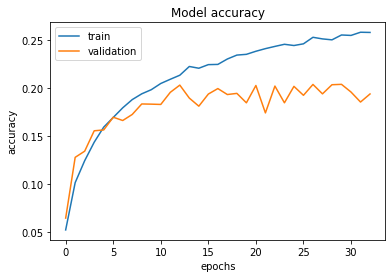

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()